<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 12** | Regressão I
Caderno de **exercício 02**<br>

Transformações em X e Y

Discente: Samuel Saturno

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

importando o pacote de dados

In [12]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.52e-06
Time:                        07:12:59   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

0.3021437558623867

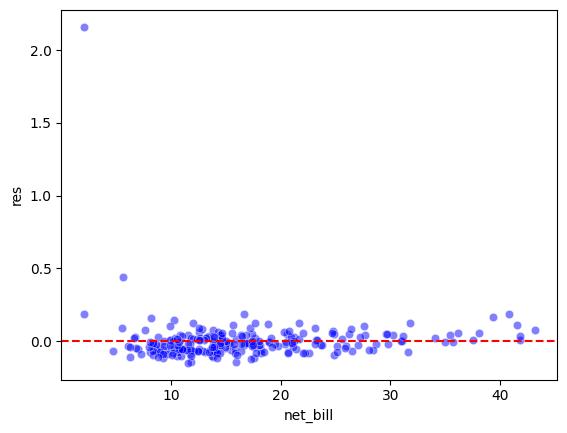

In [3]:
# Aplicando a função
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

# Visualizando o gráfico
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')

# Cálculo do R²
tips['pred'] = reg.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.62e-13
Time:                        07:13:03   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

0.44914234088544236

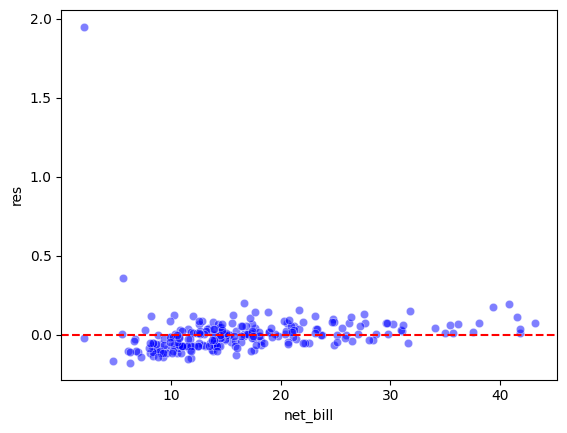

In [4]:
# Aplicando função logaritmica
reg_2 = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg_2.summary())
tips['res'] = reg_2.resid

# visualizando o gráfico
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')


# Cálculo do R²
tips['pred'] = reg_2.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]



###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.06e-09
Time:                        07:13:07   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

0.3969985482882294

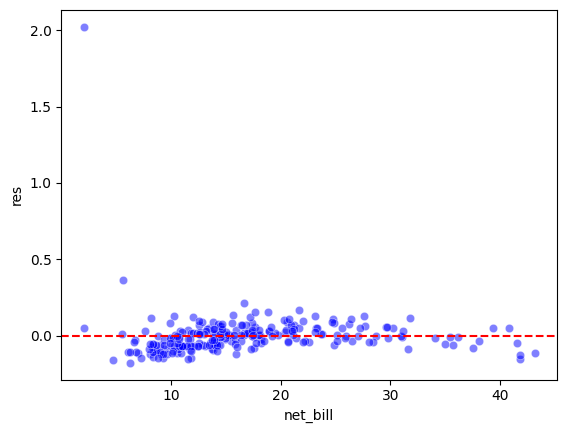

In [5]:
# Aplicando a função polinômial na variável net_bill
reg_3 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg_3.summary())
tips['res'] = reg_3.resid

# Visualizando o gráfico
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')

# Cálculo de R²
tips['pred'] = reg_3.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           8.27e-16
Time:                        07:13:10   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

0.3021437558623869

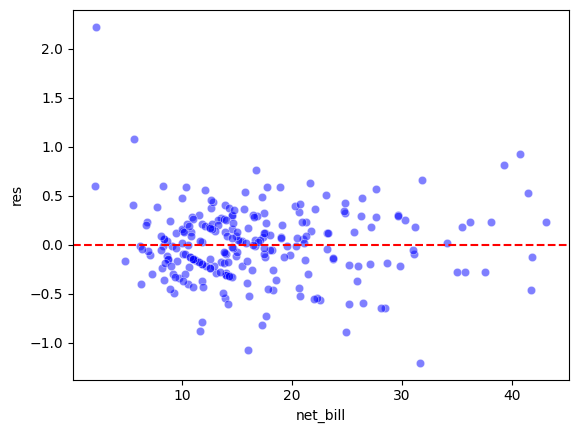

In [6]:
# Aplicando a função
reg_4 = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg_4.summary())
tips['res'] = reg_4.resid

# Visualizando o gráfico
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')

# Cálculo do R²
tips['pred'] = reg_4.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           5.20e-20
Time:                        07:13:15   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

0.4491423408854424

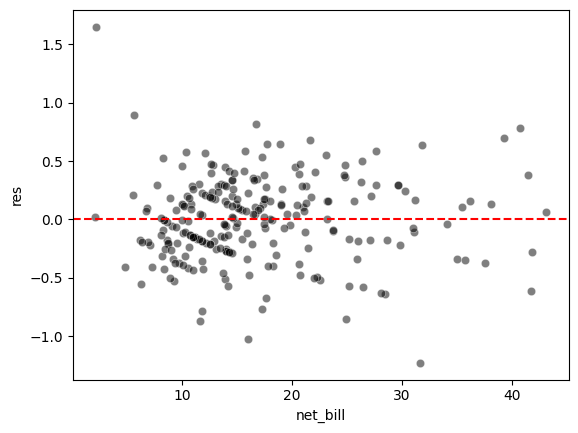

In [7]:
# Aplicando a função log nas duas variáveis
reg_5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg_5.summary())
tips['res'] = reg_5.resid

# visualizando o gráfico
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .5, color='black')
plt.axhline(y=0, color='red', linestyle='--')

# cálculo do R²
tips['pred'] = reg_5.fittedvalues
tips[['pred', 'tip_pct']].corr().iloc[0,1]

###  6. qual modelo resultou no melhor ajuste?

In [15]:
# Cálculo do coeficiente de correlação para o primeiro modelo
tips['pred'] = reg.fittedvalues
corr_1 = tips[['pred', 'tip_pct']].corr().iloc[0, 1]

# Cálculo do coeficiente de correlação para o segundo modelo
tips['pred'] = reg_2.fittedvalues
corr_2 = tips[['pred', 'tip_pct']].corr().iloc[0, 1]

# Cálculo do coeficiente de correlação para o terceiro modelo
tips['pred'] = reg_3.fittedvalues
corr_3 = tips[['pred', 'tip_pct']].corr().iloc[0, 1]

# Cálculo do coeficiente de correlação para o quarto modelo
tips['pred'] = reg_4.fittedvalues
corr_4 = tips[['pred', 'tip_pct']].corr().iloc[0, 1]

# Cálculo do coeficiente de correlação para o quinto modelo
tips['pred'] = reg_5.fittedvalues
corr_5 = tips[['pred', 'tip_pct']].corr().iloc[0, 1]

# Imprimir os coeficientes de correlação para cada modelo
print("Coeficiente de correlação para o primeiro modelo:", corr_1)
print("Coeficiente de correlação para o segundo modelo:", corr_2)
print("Coeficiente de correlação para o terceiro modelo:", corr_3)
print("Coeficiente de correlação para o quarto modelo:", corr_4)
print("Coeficiente de correlação para o quinto modelo:", corr_5)


Coeficiente de correlação para o primeiro modelo: 0.3021437558623867
Coeficiente de correlação para o segundo modelo: 0.44914234088544236
Coeficiente de correlação para o terceiro modelo: 0.3969985482882294
Coeficiente de correlação para o quarto modelo: 0.3021437558623869
Coeficiente de correlação para o quinto modelo: 0.4491423408854424


Insight:

Analisando os valores do coeficiente de correlação das cinco amostras podemos verificar que o segundo e quinto modelo obtiveram os melhores desempenho.